In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pytrends.request import TrendReq
from pprint import pprint
import string
import praw
import datetime

# Import API key
from config import reddit_id
from config import reddit_secret
from config import username
from config import password


In [13]:
# Import Reddit credentials
reddit = praw.Reddit(client_id=reddit_id,
                     client_secret=reddit_secret,
                     password=password,
                     user_agent=f"script by u/{username}",
                     username=username)
print(reddit.user.me())
# Initialize count and lists for DataFrame
count=0
timestamps=[]
timestamps_conv=[]
submission_title=[]
likes=[]


for submission in reddit.subreddit('news').search('democratic', sort='new', time_filter='year', limit=300):
   count+=1
   print(count)
   timestamps.append(submission.created)
   print(submission.created)
   value = datetime.datetime.fromtimestamp(submission.created)
   timestamps_conv.append(value)
   print(value)
   submission_title.append(submission.title)
   print(submission.title)
   likes.append(submission.ups)
   print(submission.ups)

Admer2019
1
1536212930.0
2018-09-05 22:48:50
Confederate group loses fight over Ole Miss' Civil War monuments changes
494
2
1535704477.0
2018-08-31 01:34:37
NBC Threatened Ronan Farrow If He Kept Reporting on Harvey Weinstein
6238
3
1535505197.0
2018-08-28 18:13:17
Instagram combats misinformation and trolls with three new features
0
4
1535282005.0
2018-08-26 04:13:25
Georgia officials say it’s too late to switch to paper ballots despite security worries
1186
5
1535058321.0
2018-08-23 14:05:21
Democratic National Committee now says hacking attempt was only a test
2383
6
1534340067.0
2018-08-15 06:34:27
In first, transgender woman wins Democratic nomination for Vermont governor
1943
7
1534031558.0
2018-08-11 16:52:38
Police chief's son, 18, charged with beating elderly Sikh man, smiles, flips bird in court: reports
42749
8
1533592559.0
2018-08-06 14:55:59
'It's really sensless:' One killed, four injured in Baltimore shootings during ceasefire weekend
76
9
1533163553.0
2018-08-01 15:45:5

In [14]:
#New dictionnary names
reddit_dict={"Time Created":timestamps,
          "Time Created (Human-Readable)":timestamps_conv,
          "Title": submission_title,
          "Likes": likes}

reddit_df=pd.DataFrame(reddit_dict)
reddit_df

,Time Created,Time Created (Human-Readable),Title,Likes
0,1.536213e+09,2018-09-05 22:48:50,Confederate group loses fight over Ole Miss' C...,494
1,1.535704e+09,2018-08-31 01:34:37,NBC Threatened Ronan Farrow If He Kept Reporti...,6238
2,1.535505e+09,2018-08-28 18:13:17,Instagram combats misinformation and trolls wi...,0
3,1.535282e+09,2018-08-26 04:13:25,Georgia officials say it’s too late to switch ...,1186
4,1.535058e+09,2018-08-23 14:05:21,Democratic National Committee now says hacking...,2383
5,1.534340e+09,2018-08-15 06:34:27,"In first, transgender woman wins Democratic no...",1943
6,1.534032e+09,2018-08-11 16:52:38,"Police chief's son, 18, charged with beating e...",42749
7,1.533593e+09,2018-08-06 14:55:59,"'It's really sensless:' One killed, four injur...",76
8,1.533164e+09,2018-08-01 15:45:53,"Former lobbyist Tony Podesta, others under inv...",1957
9,1.532736e+09,2018-07-27 17:02:54,CBS shares Fall after Moonves Accused of Sexua...,286


In [15]:
#filter out likes by median

mostliked_df = reddit_df.loc[reddit_df["Likes"] >=reddit_df["Likes"].median(), :]
#df.loc[df['shield'] > 6
mostliked_df=mostliked_df.reset_index()

In [16]:
#Sort most liked articles by time created

mostliked_df.sort_values(by=("Time Created"), ascending=False)

,index,Time Created,Time Created (Human-Readable),Title,Likes
0,0,1.536213e+09,2018-09-05 22:48:50,Confederate group loses fight over Ole Miss' C...,494
1,1,1.535704e+09,2018-08-31 01:34:37,NBC Threatened Ronan Farrow If He Kept Reporti...,6238
2,3,1.535282e+09,2018-08-26 04:13:25,Georgia officials say it’s too late to switch ...,1186
3,4,1.535058e+09,2018-08-23 14:05:21,Democratic National Committee now says hacking...,2383
4,5,1.534340e+09,2018-08-15 06:34:27,"In first, transgender woman wins Democratic no...",1943
5,6,1.534032e+09,2018-08-11 16:52:38,"Police chief's son, 18, charged with beating e...",42749
6,8,1.533164e+09,2018-08-01 15:45:53,"Former lobbyist Tony Podesta, others under inv...",1957
7,9,1.532736e+09,2018-07-27 17:02:54,CBS shares Fall after Moonves Accused of Sexua...,286
8,11,1.531971e+09,2018-07-18 20:29:58,Shots fired through window of Albany County De...,2392
9,12,1.530789e+09,2018-07-05 04:07:55,Protester arrested after climbing base of Stat...,789


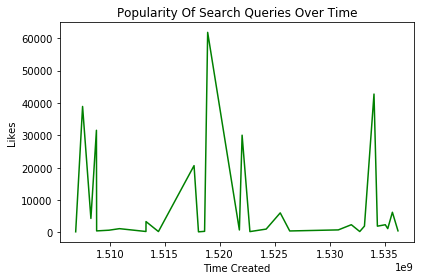

In [17]:
#Show the line graph for the popularity of search queries over time
plt.plot(mostliked_df["Time Created"], mostliked_df["Likes"], color='g')
#plt.plot(year, pop_india, color='orange')
plt.xlabel('Time Created')
plt.ylabel('Likes')
plt.title('Popularity Of Search Queries Over Time')
plt.tight_layout()
plt.show()